# Iris Flower Clustering Analysis

### Author : Aditya Prabaswara Mardjikoen

### The Sparks Foundation Internship (April 2021) Task 2 - Prediction using Unsupervised Machine Learning

In this clustering task we will predict the optimum number of clusters in the Iris dataset and represent it visually. First we will import the required Python library and display the first five row in the dataset.

In [1]:
# Imported all required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import warnings
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn import metrics
%matplotlib inline
sns.set_style("whitegrid", {'axes.grid' : False})
warnings.filterwarnings("ignore")

In [2]:
# Display first five row in the data
iris=pd.read_csv('https://raw.githubusercontent.com/aprabaswara/Iris-Flower-Species-Analysis/main/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Next we will display the data types and a few descriptive statistics for the Iris dataset based on its species.

In [3]:
# Display data type
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# Display columns in the data
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
# Display the categorical variable descriptive statistics
iris.describe(include=['object'])

,Species
count,150
unique,3
top,Iris-virginica
freq,50


In [28]:
# Display the numerical variable average
iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species']].groupby(['Species']).mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


From the table above, we can say that Iris virginica has the longest Sepal and Petal from the three species. In addition, its petal is the widest than other species. However, its sepal is Stil not as wide as Iris-setosa, who has the widest sepal compare to other species.

We know move to our next steps, Exploratory Data Analysis. I create a data visualization in a pair plot to make it easier to analyze.

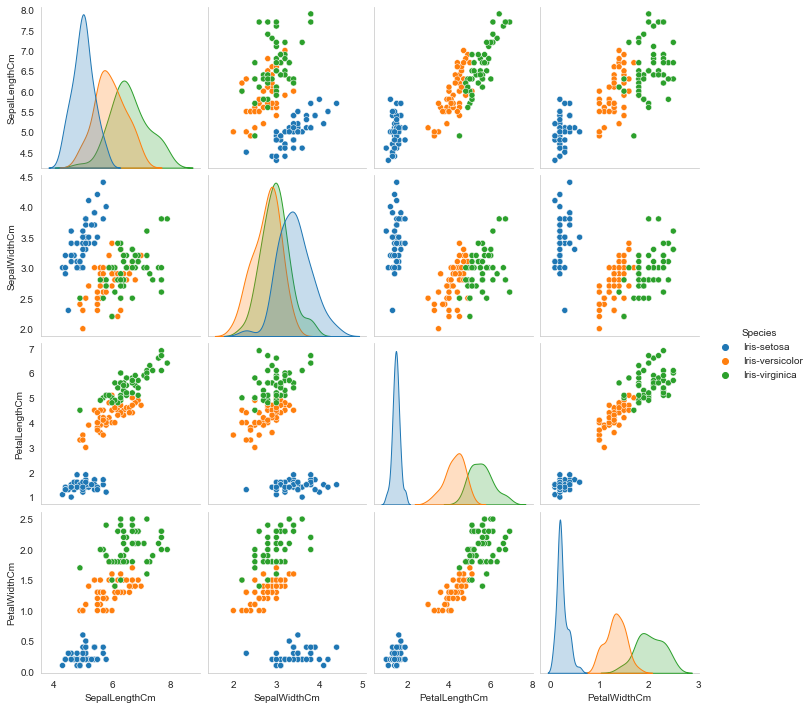

In [17]:
sns.pairplot(iris.drop(['Id'],axis=1),hue='Species')

Then, I use the Elbow method to estimate the number of optimum clusters.

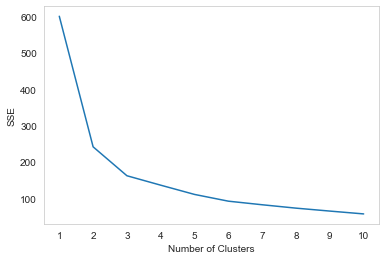

In [10]:
kmeans_kwargs = {"init": 'k-means++',"n_init": 10,"max_iter": 300,"random_state": 0}
scaler = StandardScaler()
x= iris.iloc[:, [0, 1, 2, 3]].values
scaled_features = scaler.fit_transform(x)
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

From the line chart above, we can see that the Sum Squared Error (SSE) sharply decrease when we grouped the iris flower into 3 or more cluster. So, the optimum number of cluster for the iris dataset is three cluster. Lastly, we know visualize the result of K-Means clustering in a scatter plot with each cluster central point (centroids).

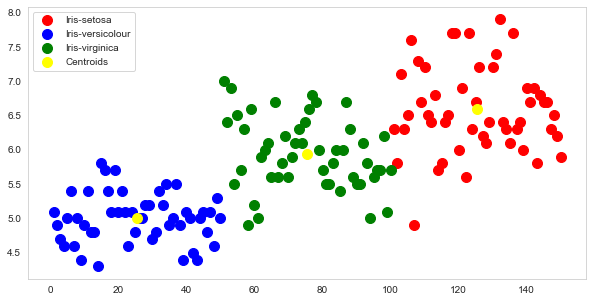

In [11]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = kmeans = KMeans(n_clusters=3, **kmeans_kwargs)
y_kmeans = kmeans.fit_predict(x)
# Visualize cluster  in scatter plot
plt.figure(figsize=(10,5))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()